In [1]:
import pandas as pd

In [1]:
import pandas as pd
from textblob import TextBlob

# loading reviews data
reviews_sample_df = pd.read_csv('Reviews_sample.csv')


/var/folders/w7/r3sj_l0s11j7mjvdks7hxdzw0000gn/T/ipykernel_32184/3939070598.py:5: DtypeWarning: Columns (2,15) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_sample_df = pd.read_csv('Reviews_sample.csv')


In [3]:
len(reviews_sample_df)

100000

In [4]:
reviews_sample_df.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,...,brand,feature,rank,also_view,main_cat,date,price,imageURL,imageURLHighRes,details
0,1169768,5.0,NaN,True,"04 12, 2018",A3UZAC96WO3X75,B001EAWS3W,{'Package Type:': ' Standard Packaging'},Chad F,Worked perfectly to install an aftermarket sys...,...,PAC,"['<span class=""a-size-base a-color-secondary"">...",[],"['B00LIAHSM4', 'B00IYER9QC', 'B00I4EF1BC', 'B0...",Car Electronics,NaN,$7.99,[],[],{'\n Product Dimensions: \n ': '9 x 1.5 ...
1,5102224,5.0,NaN,True,"11 24, 2017",A3HRKCSHH2DADT,B00V5JSCXC,{'Color:': ' Coffee'},Ginger Bear,"So far, it's great...! Nice and roomy with a l...",...,GEARONIC TM,['SPACIOUS AND VERSITLE: This large duffle bag...,"46,773 in Clothing, Shoes & Jewelry (","['B018MS3R2E', 'B013FFAJRU', 'B01M0USAQ8', 'B0...","<img src=""https://images-na.ssl-images-amazon....","<td class=""comparison_table_first_col"">",$17.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
2,1849245,5.0,NaN,True,"04 2, 2018",A1R3OCBCFUVK00,B004FHO5Y6,NaN,Leonard,Great value,...,Logitech,['HD 720p video calling and HD video recording...,['>#2 in Computers & Accessories > Computer Ac...,[],Computers,"December 26, 2010",$19.86,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
3,2112439,4.0,NaN,True,"01 4, 2017",A2ND6CMCXVTPRN,B0058EG0KC,{'Size:': ' 12 Pack'},Brian P. Lawler,Now I can plug everything in at my apartment i...,...,Orei,['Converts 2 or 3 pin American plug to euro/Ge...,['>#19 in Electronics > Accessories & Supplies...,[],Home Audio & Theater,"January 28, 2011",$8.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
4,3080441,5.0,3,True,"12 3, 2013",AXGRRHMUPVMV5,B00AWIPITS,{'Color:': ' Black'},Amazon Customer,2ND pair. Original pair I regret having given ...,...,Kinivo,['Compatible with Bluetooth enabled music play...,"['>#18,646 in Cell Phones & Accessories (See T...","['B005LKB0IU', 'B06Y5WWTWD', 'B01AKSJUH0', 'B0...",Cell Phones & Accessories,NaN,$4.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}


In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

reviews_sample_df['reviewText'] = reviews_sample_df['reviewText'].astype(str)

# apply sentiment analysis to each row in the dataset and store the results in a new column
reviews_sample_df['polarity_score'] = reviews_sample_df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harita_addanki/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
reviews_sample_df['len'] = reviews_sample_df['reviewText'].apply(lambda x :  len(x.split()))

In [7]:
# print the updated dataset
reviews_sample_df.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,...,rank,also_view,main_cat,date,price,imageURL,imageURLHighRes,details,polarity_score,len
0,1169768,5.0,NaN,True,"04 12, 2018",A3UZAC96WO3X75,B001EAWS3W,{'Package Type:': ' Standard Packaging'},Chad F,Worked perfectly to install an aftermarket sys...,...,[],"['B00LIAHSM4', 'B00IYER9QC', 'B00I4EF1BC', 'B0...",Car Electronics,NaN,$7.99,[],[],{'\n Product Dimensions: \n ': '9 x 1.5 ...,0.6900,37
1,5102224,5.0,NaN,True,"11 24, 2017",A3HRKCSHH2DADT,B00V5JSCXC,{'Color:': ' Coffee'},Ginger Bear,"So far, it's great...! Nice and roomy with a l...",...,"46,773 in Clothing, Shoes & Jewelry (","['B018MS3R2E', 'B013FFAJRU', 'B01M0USAQ8', 'B0...","<img src=""https://images-na.ssl-images-amazon....","<td class=""comparison_table_first_col"">",$17.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.7712,44
2,1849245,5.0,NaN,True,"04 2, 2018",A1R3OCBCFUVK00,B004FHO5Y6,NaN,Leonard,Great value,...,['>#2 in Computers & Accessories > Computer Ac...,[],Computers,"December 26, 2010",$19.86,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.7579,2
3,2112439,4.0,NaN,True,"01 4, 2017",A2ND6CMCXVTPRN,B0058EG0KC,{'Size:': ' 12 Pack'},Brian P. Lawler,Now I can plug everything in at my apartment i...,...,['>#19 in Electronics > Accessories & Supplies...,[],Home Audio & Theater,"January 28, 2011",$8.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.4404,23
4,3080441,5.0,3,True,"12 3, 2013",AXGRRHMUPVMV5,B00AWIPITS,{'Color:': ' Black'},Amazon Customer,2ND pair. Original pair I regret having given ...,...,"['>#18,646 in Cell Phones & Accessories (See T...","['B005LKB0IU', 'B06Y5WWTWD', 'B01AKSJUH0', 'B0...",Cell Phones & Accessories,NaN,$4.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.9791,186


In [228]:
len(reviews_sample_df)

100000

In [4]:
#copying the data into another data frame
sentimental_review_data_df = reviews_sample_df.copy(deep=True)

In [5]:
#saving the data in excel
sentimental_review_data_df.to_excel('sentimentalreviewdata-G.xlsx')

In [235]:
sentimental_review_data_df.head()

,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,...,rank,also_view,main_cat,date,price,imageURL,imageURLHighRes,details,polarity_score,len
0,1169768,5.0,NaN,True,"04 12, 2018",A3UZAC96WO3X75,B001EAWS3W,{'Package Type:': ' Standard Packaging'},Chad F,Worked perfectly to install an aftermarket sys...,...,[],"['B00LIAHSM4', 'B00IYER9QC', 'B00I4EF1BC', 'B0...",Car Electronics,NaN,$7.99,[],[],{'\n Product Dimensions: \n ': '9 x 1.5 ...,0.6900,37
1,5102224,5.0,NaN,True,"11 24, 2017",A3HRKCSHH2DADT,B00V5JSCXC,{'Color:': ' Coffee'},Ginger Bear,"So far, it's great...! Nice and roomy with a l...",...,"46,773 in Clothing, Shoes & Jewelry (","['B018MS3R2E', 'B013FFAJRU', 'B01M0USAQ8', 'B0...","<img src=""https://images-na.ssl-images-amazon....","<td class=""comparison_table_first_col"">",$17.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.7712,44
2,1849245,5.0,NaN,True,"04 2, 2018",A1R3OCBCFUVK00,B004FHO5Y6,NaN,Leonard,Great value,...,['>#2 in Computers & Accessories > Computer Ac...,[],Computers,"December 26, 2010",$19.86,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.7579,2
3,2112439,4.0,NaN,True,"01 4, 2017",A2ND6CMCXVTPRN,B0058EG0KC,{'Size:': ' 12 Pack'},Brian P. Lawler,Now I can plug everything in at my apartment i...,...,['>#19 in Electronics > Accessories & Supplies...,[],Home Audio & Theater,"January 28, 2011",$8.99,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.4404,23
4,3080441,5.0,3,True,"12 3, 2013",AXGRRHMUPVMV5,B00AWIPITS,{'Color:': ' Black'},Amazon Customer,2ND pair. Original pair I regret having given ...,...,"['>#18,646 in Cell Phones & Accessories (See T...","['B005LKB0IU', 'B06Y5WWTWD', 'B01AKSJUH0', 'B0...",Cell Phones & Accessories,NaN,$4.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.9791,186


In [6]:
#dropping unnecessary columns
sentimental_review_data_df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
sentimental_review_data_df_tb = pd.read_excel('sentimentalreviewdata-G.xlsx')


In [12]:
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']<=-0.05,"polarity_score"] = -1
sentimental_review_data_df_tb.loc[(sentimental_review_data_df_tb['polarity_score'] >-0.05) & (sentimental_review_data_df_tb['polarity_score']<0.05),"polarity_score"] = 0
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score'] >= 0.05,"polarity_score"] = 1

In [14]:
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==-1,'sentiment']='NEGATIVE'
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==1,'sentiment']='POSITIVE'
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==0,'sentiment']='NEUTRAL'

In [16]:
sentimental_review_data_df_tb.to_excel('sentimental_review_data_df_tb.xlsx')

In [34]:
sentimental_review_data_df_tb.dropna(inplace=True)

In [35]:
sentimental_review_data_df_tb['reviewerName'].str.contains('Rodrigo Rojas').isna().sum()

0

In [36]:
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['reviewerName'].str.contains('Rodrigo Rojas'),]

,Unnamed: 0.1,Unnamed: 0,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,...,also_view,main_cat,date,price,imageURL,imageURLHighRes,details,polarity_score,len,sentiment


In [ ]:
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']<=-0.05,"polarity_score"] = -1
sentimental_review_data_df_tb.loc[(sentimental_review_data_df_tb['polarity_score'] >-0.05) & (sentimental_review_data_df_tb['polarity_score']<0.05),"polarity_score"] = 0
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score'] >= 0.05,"polarity_score"] = 1
sentimental_review_data_df_tb = reviews_sample_df.copy(deep=True)
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==-1,'sentiment']='NEGATIVE'
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==1,'sentiment']='POSITIVE'
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==0,'sentiment']='NEUTRAL'
sentimental_review_data_df_tb.to_excel('sentimentalreviewdata_tb.xlsx')

In [21]:
sentimental_review_data_df_tb.loc[sentimental_review_data_df_tb['polarity_score']==1,'sentiment']

0        POSITIVE
1        POSITIVE
2        POSITIVE
3        POSITIVE
4        POSITIVE
           ...   
99993    POSITIVE
99995    POSITIVE
99996    POSITIVE
99997    POSITIVE
99998    POSITIVE
Name: sentiment, Length: 78613, dtype: object

In [237]:
#checking the lengths of the review
max(sentimental_review_data_df['len'])

5132

In [238]:
min(sentimental_review_data_df['len'])

1

In [239]:
sentimental_review_data_df['len'].sum()/len(sentimental_review_data_df['len'])

64.89569

In [240]:
# import counter class from collections module
from collections import Counter
 
len_counts = Counter(sentimental_review_data_df['len'])


In [241]:
c_sum = 0
for i in range(20,151):
    print(str(i) + " -" + str(len_counts[i]))
    c_sum = c_sum + len_counts[i]
print(c_sum)

20 -1919
21 -1690
22 -1599
23 -1434
24 -1276
25 -1305
26 -1245
27 -1176
28 -1102
29 -1008
30 -967
31 -996
32 -905
33 -864
34 -893
35 -826
36 -786
37 -786
38 -728
39 -704
40 -709
41 -693
42 -709
43 -658
44 -642
45 -596
46 -607
47 -618
48 -596
49 -543
50 -545
51 -553
52 -525
53 -490
54 -515
55 -476
56 -496
57 -461
58 -441
59 -427
60 -412
61 -433
62 -392
63 -393
64 -394
65 -398
66 -408
67 -369
68 -373
69 -354
70 -351
71 -368
72 -340
73 -330
74 -343
75 -299
76 -321
77 -314
78 -310
79 -283
80 -290
81 -281
82 -263
83 -252
84 -250
85 -260
86 -257
87 -241
88 -258
89 -217
90 -221
91 -239
92 -224
93 -244
94 -244
95 -202
96 -208
97 -214
98 -203
99 -196
100 -206
101 -218
102 -194
103 -183
104 -196
105 -188
106 -164
107 -193
108 -172
109 -192
110 -146
111 -198
112 -176
113 -171
114 -134
115 -156
116 -163
117 -171
118 -160
119 -148
120 -165
121 -157
122 -126
123 -141
124 -134
125 -145
126 -131
127 -130
128 -150
129 -129
130 -121
131 -135
132 -117
133 -127
134 -109
135 -111
136 -118
137 -126
138 -121

In [242]:
#filtering the rows whose review text length is between 20 and 150 as ZeroGPT can support only 2M words
filtered_data_df = sentimental_review_data_df[(sentimental_review_data_df['len']>=20) & (sentimental_review_data_df['len']<=150)]

In [243]:
len(filtered_data_df)

52752

In [244]:
#taking a random sample from the filtered data
filtered_data_df = filtered_data_df.sample(n=15000,random_state=101)

In [245]:
len(filtered_data_df)

15000

In [246]:
#saving the sampled data in excel
filtered_data_df['reviewText'].to_csv('fakeData.csv')

In [247]:
# load sampled reviews data into a Pandas DataFrame
filtered_data_df = pd.read_csv('fakeData.csv')
filtered_data_df.head()

,Unnamed: 0,reviewText
0,6332,"These really sounded nice for about 2.5 weeks,..."
1,39944,Good drive! Works great with no problems to s...
2,18169,"Nice camera, i bought when my d5200 was stolen..."
3,55427,This adaptor is a perfect fit for my Canon SX5...
4,42434,What a wonderful case! I have two ACER chromeb...


In [258]:
# reading only 250 instances as api could only process 250 requests per hour.
filtered_data_df_250 = filtered_data_df.iloc[3255:3505]

In [259]:
filtered_data_df_250

,Unnamed: 0,reviewText
3255,94232,This is a nice aluminum bare hard drive case. ...
3256,70810,"Great hard disk drive for my laptop. Not slow,..."
3257,27960,Worked Fine in my testing. Didn't need a lot ...
3258,79709,"While they shipped their product on time, the ..."
3259,65981,It's amazing that this has totally replaced my...
...,...,...
3500,60826,A solid-feeling keyboard. There doesn't appear...
3501,39713,I like the high quality of workmanship this ba...
3502,25350,These Adapt-its are well thought out in that t...
3503,19604,Didn't help improve audio streaming as adverti...


## ChatGPT Detection



This section analyze each review if they are written by chatGPT or not.

In [260]:
#!pip install gptzero
from gptzero import GPTZeroAPI

In [261]:
# the api key to generate the predictions
api_key = '7dccb75991404b0380da4dadf334514b'
gptzero_api = GPTZeroAPI(api_key)

In [262]:
prob_data = filtered_data_df_250.copy(deep=True)

In [263]:
# sending the review text data (in batches of 250 instances per hour) to the api in order to predict probabilities
prob_data['ai_prob_score'] = df['reviewText'].apply(lambda x: gptzero_api.text_predict(x))

In [264]:
# API would give the error as API key has expired
prob_data.head()

,Unnamed: 0,reviewText,ai_prob_score
3255,94232,This is a nice aluminum bare hard drive case. ...,{'error': 'API key has expired. If you have an...
3256,70810,"Great hard disk drive for my laptop. Not slow,...",{'error': 'API key has expired. If you have an...
3257,27960,Worked Fine in my testing. Didn't need a lot ...,{'error': 'API key has expired. If you have an...
3258,79709,"While they shipped their product on time, the ...",{'error': 'API key has expired. If you have an...
3259,65981,It's amazing that this has totally replaced my...,{'error': 'API key has expired. If you have an...


In [265]:
# saved the response data we got in one excel
#prob_data.to_excel('fake_prob.xlsx')

In [266]:
prob_data = pd.read_excel('fake_prob.xlsx')

In [267]:
len(prob_data)

2927

In [268]:
prob_data

,Unnamed: 0.1,Unnamed: 0,reviewText,ai_prob_score
0,0,0,"These really sounded nice for about 2.5 weeks,...","{'documents': [{'average_generated_prob': 0, '..."
1,1,1,Good drive! Works great with no problems to s...,"{'documents': [{'average_generated_prob': 0, '..."
2,2,2,"Nice camera, i bought when my d5200 was stolen...","{'documents': [{'average_generated_prob': 0, '..."
3,3,3,This adaptor is a perfect fit for my Canon SX5...,"{'documents': [{'average_generated_prob': 0, '..."
4,4,4,What a wonderful case! I have two ACER chromeb...,"{'documents': [{'average_generated_prob': 0, '..."
...,...,...,...,...
2922,2922,495,Great Neutral Closed Headphones. These are ver...,"{'documents': [{'average_generated_prob': 0, '..."
2923,2923,496,I bought this with a few concerns. But I am so...,{'documents': [{'average_generated_prob': 0.25...
2924,2924,497,I bought this due to several bugs we were expe...,"{'documents': [{'average_generated_prob': 0, '..."
2925,2925,498,they did what they are supposed to do. none we...,"{'documents': [{'average_generated_prob': 0, '..."


In [269]:
prob_data.drop('Unnamed: 0.1',axis=1,inplace=True)

In [270]:
prob_data.drop('Unnamed: 0',axis=1,inplace=True)

In [271]:
prob_data

,reviewText,ai_prob_score
0,"These really sounded nice for about 2.5 weeks,...","{'documents': [{'average_generated_prob': 0, '..."
1,Good drive! Works great with no problems to s...,"{'documents': [{'average_generated_prob': 0, '..."
2,"Nice camera, i bought when my d5200 was stolen...","{'documents': [{'average_generated_prob': 0, '..."
3,This adaptor is a perfect fit for my Canon SX5...,"{'documents': [{'average_generated_prob': 0, '..."
4,What a wonderful case! I have two ACER chromeb...,"{'documents': [{'average_generated_prob': 0, '..."
...,...,...
2922,Great Neutral Closed Headphones. These are ver...,"{'documents': [{'average_generated_prob': 0, '..."
2923,I bought this with a few concerns. But I am so...,{'documents': [{'average_generated_prob': 0.25...
2924,I bought this due to several bugs we were expe...,"{'documents': [{'average_generated_prob': 0, '..."
2925,they did what they are supposed to do. none we...,"{'documents': [{'average_generated_prob': 0, '..."


In [272]:
# conversion of string generated from api into an object
prob_data['ai_prob_score'] = prob_data['ai_prob_score'].apply(eval)

In [273]:
# extraction of probabilities from the response object
prob_data['Prob']=prob_data['ai_prob_score'].apply(lambda x : x['documents'][0]['average_generated_prob'])

In [274]:
#filtering the data only of which we have the GPTZero response
fake_reviews_df = prob_data.merge(filterdata,how='inner',on='reviewText')

In [275]:
fake_reviews_df.head()

,reviewText,ai_prob_score,Prob,overall,vote,verified,reviewTime,reviewerID,asin,style,...,rank,also_view,main_cat,date,price,imageURL,imageURLHighRes,details,polarity_score,len
0,"These really sounded nice for about 2.5 weeks,...","{'documents': [{'average_generated_prob': 0, '...",0.0,2.0,5,True,"09 20, 2017",A2UV92DEW0LWMS,B000062VUQ,{'Size:': ' 3-piece'},...,['>#131 in Electronics > Accessories & Supplie...,"['B003VAHYTG', 'B01LW1XF0Z', 'B0030ZLZ5G', 'B0...",All Electronics,"April 16, 2002",NaN,[],[],{},-0.0800,78
1,Good drive! Works great with no problems to s...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5.0,NaN,True,"01 26, 2014",A37W0NS4J9TNJ8,B00ECPCK0M,NaN,...,['>#313 in Computers & Accessories > Computer ...,[],Computers,"August 5, 2013",NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.8436,26
2,"Nice camera, i bought when my d5200 was stolen...","{'documents': [{'average_generated_prob': 0, '...",0.0,5.0,NaN,True,"04 13, 2014",A1FISII93S19CS,B00FXYT12G,"{'Color:': ' Black', 'Configuration:': ' Base'...",...,"['>#4,618 in Camera & Photo (See Top 100 in Ca...","['B079QGR2TT', 'B01N7OJNEX', 'B00FYJ5CIW', 'B0...",Camera & Photo,"October 17, 2013",$328.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.6486,51
3,This adaptor is a perfect fit for my Canon SX5...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5.0,NaN,False,"04 26, 2014",A1GBZVJG54MXV6,B0057G2TH4,NaN,...,['>#209 in Camera & Photo > Camera & Photo Acc...,"['B0721QPGR6', 'B079BJV9Y8', 'B06XWSLV5Y', 'B0...",Camera & Photo,"October 25, 2010",$10.90,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.6904,73
4,What a wonderful case! I have two ACER chromeb...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5.0,NaN,False,"03 3, 2016",A1EPHD4E18OFWO,B00Q6KQ61A,NaN,...,"['>#44,444 in Computers & Accessories (See top...","['B00VVZPO3G', 'B0146UBFX0', 'B00ZGE9CT0', 'B0...",Computers,"November 26, 2014",NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},0.9729,88


In [276]:
# import counter class from collections module
from collections import Counter
 
prob_counts = Counter(fake_reviews_df['Prob'])

In [277]:
prob_counts

Counter({0.0: 2353,
         0.16666666666666666: 16,
         0.6666666666666666: 44,
         0.25: 58,
         1.0: 106,
         0.125: 14,
         0.2: 33,
         0.14285714285714285: 20,
         0.5: 73,
         0.18181818181818182: 3,
         0.7142857142857143: 1,
         0.375: 3,
         0.1: 3,
         0.42857142857142855: 6,
         0.3333333333333333: 72,
         0.09090909090909091: 4,
         0.5714285714285714: 4,
         0.6: 14,
         0.4: 20,
         0.4444444444444444: 3,
         0.75: 12,
         0.05555555555555555: 1,
         0.8: 12,
         0.3: 2,
         0.2857142857142857: 13,
         0.08333333333333333: 1,
         0.5555555555555556: 3,
         0.1111111111111111: 6,
         0.8181818181818182: 1,
         0.625: 2,
         0.2222222222222222: 2,
         0.8333333333333334: 5,
         0.5454545454545454: 1,
         0.06666666666666667: 1,
         0.2727272727272727: 2,
         0.07142857142857142: 1,
         0.214285714285

In [278]:
# Categorizing the probabilities with less than or equal to 0.5 as not FAKE
fake_reviews_df.iloc[fake_review['Prob']<=0.5,2] = 0


In [279]:
# Categorizing the probabilities with greater than 0.5 as FAKE
fake_reviews_df.iloc[fake_review['Prob']>0.5,2] = 1

In [280]:
len(fake_reviews_df)

2927

In [281]:
# number of fake reviews
sum(fake_reviews_df['Prob']== 1)

211

In [282]:
# number of non fake reviews
sum(fake_reviews_df['Prob']== 0)

2716

In [284]:
fake_reviews_df.loc[fake_reviews_df['polarity_score']<=-0.05,"polarity_score"] = -1

In [285]:
fake_reviews_df.loc[fake_reviews_df['polarity_score']>-0.05,"polarity_score"] = 0

In [286]:
fake_reviews_df.loc[fake_reviews_df['polarity_score']>=0.05,"polarity_score"] = 1

In [287]:
fake_polarity_counts = Counter(fake_reviews_df['polarity_score'])

In [288]:
fake_polarity_counts

Counter({-1.0: 460, 0.0: 2467})

In [289]:
# saving the end results to an excel file
fake_reviews_df.to_excel('results.xlsx')

In [290]:
#!pip install seaborn

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

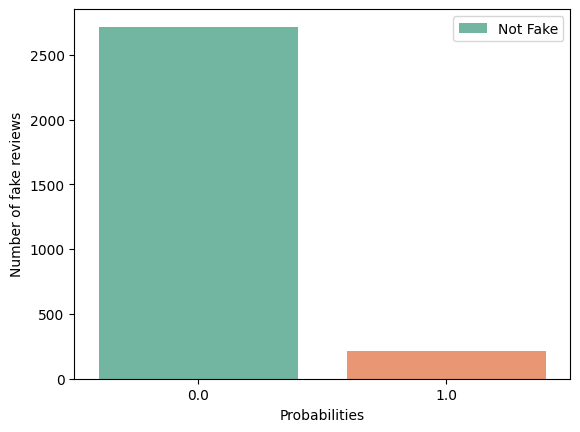

In [292]:
ax = sns.countplot(x=fake_review["Prob"],palette = "Set2")
ax.set(xlabel='Probabilities', ylabel='Number of fake reviews')
plt.legend(labels=['Not Fake', 'Fake'])

In [107]:
fake_reviews_df.head()

,reviewText,ai_prob_score,Prob,overall,vote,verified,reviewTime,reviewerID,asin,style,...,rank,also_view,main_cat,date,price,imageURL,imageURLHighRes,details,polarity_score,len
0,"These really sounded nice for about 2.5 weeks,...","{'documents': [{'average_generated_prob': 0, '...",0.0,2,5,True,"09 20, 2017",A2UV92DEW0LWMS,B000062VUQ,{'Size:': ' 3-piece'},...,['>#131 in Electronics > Accessories & Supplie...,"['B003VAHYTG', 'B01LW1XF0Z', 'B0030ZLZ5G', 'B0...",All Electronics,"April 16, 2002",NaN,[],[],{},0.0,78
1,Good drive! Works great with no problems to s...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5,NaN,True,"01 26, 2014",A37W0NS4J9TNJ8,B00ECPCK0M,NaN,...,['>#313 in Computers & Accessories > Computer ...,[],Computers,"August 5, 2013",NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},1.0,26
2,"Nice camera, i bought when my d5200 was stolen...","{'documents': [{'average_generated_prob': 0, '...",0.0,5,NaN,True,"04 13, 2014",A1FISII93S19CS,B00FXYT12G,"{'Color:': ' Black', 'Configuration:': ' Base'...",...,"['>#4,618 in Camera & Photo (See Top 100 in Ca...","['B079QGR2TT', 'B01N7OJNEX', 'B00FYJ5CIW', 'B0...",Camera & Photo,"October 17, 2013",$328.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},1.0,51
3,This adaptor is a perfect fit for my Canon SX5...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5,NaN,False,"04 26, 2014",A1GBZVJG54MXV6,B0057G2TH4,NaN,...,['>#209 in Camera & Photo > Camera & Photo Acc...,"['B0721QPGR6', 'B079BJV9Y8', 'B06XWSLV5Y', 'B0...",Camera & Photo,"October 25, 2010",$10.90,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},1.0,73
4,What a wonderful case! I have two ACER chromeb...,"{'documents': [{'average_generated_prob': 0, '...",0.0,5,NaN,False,"03 3, 2016",A1EPHD4E18OFWO,B00Q6KQ61A,NaN,...,"['>#44,444 in Computers & Accessories (See top...","['B00VVZPO3G', 'B0146UBFX0', 'B00ZGE9CT0', 'B0...",Computers,"November 26, 2014",NaN,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{},1.0,88


### Word Cloud 

In [231]:
#!pip install wordcloud

In [295]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [296]:
review_text = " ".join(review for review in sentimental_review_data_df.reviewText if isinstance(review, str))

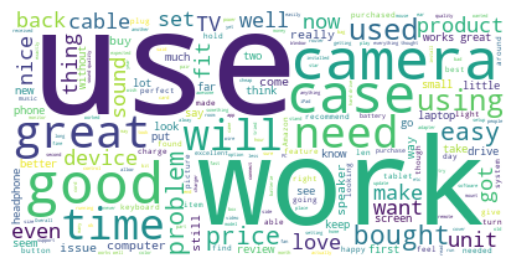

In [297]:
# Create stopword list:
stopwords_review = set(STOPWORDS)
stopwords_review.update(["one"])

# Generate a word cloud image
wordcloud_text = WordCloud(stopwords=stopwords_review, background_color="white").generate(review_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis("off")
plt.show()

# Export to png
# wordcloud_text.to_file("wordcloud_text.png")

## Word Cloud for Positive Review 

In [307]:
pos_polarity_df = sentimental_review_data_df[sentimental_review_data_df["polarity_score"] >= 0.05]
neu_polarity_df = sentimental_review_data_df[(sentimental_review_data_df["polarity_score"] > -0.05) & (sentimental_review_data_df["polarity_score"] < 0.05)]
neg_polarity_df = sentimental_review_data_df[sentimental_review_data_df["polarity_score"] <= -0.05]

In [311]:
print(len(pos_polarity_df))
print(len(neu_polarity_df))  
print(len(neg_polarity_df)) 

78613
8747
12640


In [300]:
review_text = " ".join(review for review in pos_polarity_df.reviewText if isinstance(review, str))

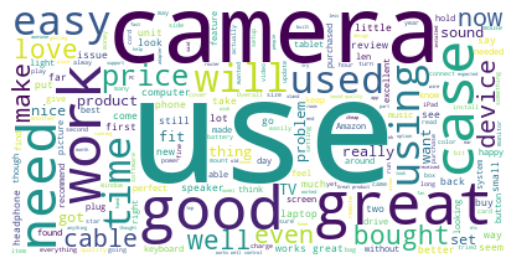

In [301]:
# Create stopword list:
stopwords_review = set(STOPWORDS)
stopwords_review.update(["one"])

# Generate a word cloud image
wordcloud_text = WordCloud(stopwords=stopwords_review, background_color="white").generate(review_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis("off")
plt.show()

# Export to png
# wordcloud_text.to_file("wordcloud_text.png")

## Word Cloud for Negative Review

In [303]:
review_text = " ".join(review for review in neg_polarity_df.reviewText if isinstance(review, str))

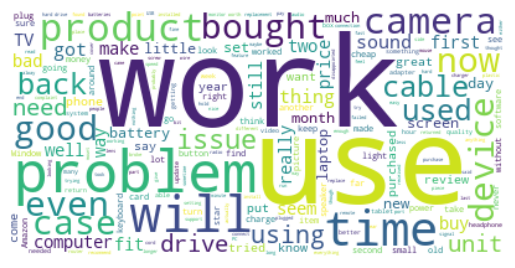

In [304]:
# Create stopword list:
stopwords_review = set(STOPWORDS)
stopwords_review.update(["one"])

# Generate a word cloud image
wordcloud_text = WordCloud(stopwords=stopwords_review, background_color="white").generate(review_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis("off")
plt.show()

# Export to png
# wordcloud_text.to_file("wordcloud_text.png")

### Word Cloud for Neutral Review

In [312]:
review_text = " ".join(review for review in neu_polarity_df.reviewText if isinstance(review, str))

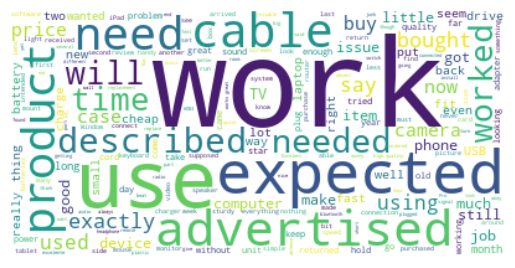

In [313]:
# Create stopword list:
stopwords_review = set(STOPWORDS)
stopwords_review.update(["one"])

# Generate a word cloud image
wordcloud_text = WordCloud(stopwords=stopwords_review, background_color="white").generate(review_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis("off")
plt.show()

# Export to png
# wordcloud_text.to_file("wordcloud_text.png")